## Load Packages

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## import data

In [35]:
df_SNP = pd.read_csv ("matrix_1kg.txt",sep='\t')
df_SNP

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# add a column for allele frequency
allele_freq=df_SNP.iloc[:,4:].sum(axis=1)/(2*len(df_SNP.iloc[1,4:]))
allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

In [37]:
#extract SNP with allele frequency between 0.05 and 0.95
roi_df=df_SNP[(allele_freq <=0.95)& (allele_freq>=0.05)]
roi_df
# Be careful to use the () before and after&

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


## PCA based on common variation

In [38]:
pca_input=roi_df.iloc[:,4:]
pca_input



# pca_input_standardized = StandardScaler().fit_transform(pca_input)


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [39]:
#transpose the database
pca_input = pca_input.T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [40]:
#do the standard scaling
pca_input_standardized = StandardScaler().fit_transform(pca_input)
#check the mean
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [41]:
# check the variance
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [42]:
# do pca
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856681, -1.54618533, ...,  2.18565729,
        -4.10862123,  2.25482494],
       [-6.13388414, -8.63182891,  2.55689247, ...,  3.28147302,
        -0.96898547, -2.02412715],
       [-6.23847319, -7.97186999, -0.74615225, ..., -2.03412645,
         0.50156635,  0.7381222 ],
       ...,
       [-4.09694721, -2.82736169, -4.18041171, ..., -0.56372044,
         4.42729931, -2.46456733],
       [-6.26346243, -2.58507976, -4.22550889, ..., -2.23750063,
         0.52866714, -1.87992609],
       [-3.17677867, -0.91694953, -6.45050383, ...,  1.33294208,
         2.40053998, -1.58969233]])

In [43]:
#check if the data points number is correct
pca_output.shape

(2548, 10)

In [44]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546185,-5.395277,-0.536101,-0.279939,-1.228203,2.185657,-4.108621,2.254825
1,-6.133884,-8.631829,2.556892,-3.895277,0.340731,-2.447808,3.423433,3.281473,-0.968985,-2.024127
2,-6.238473,-7.971870,-0.746152,-4.013448,-0.930016,4.054860,-1.075752,-2.034126,0.501566,0.738122
3,-5.051218,-7.008727,2.804973,-4.761999,4.385553,0.226269,-0.891441,-2.618239,1.312910,1.537064
4,-6.634383,-8.543670,3.071428,-1.592687,-4.367445,0.821827,-3.516269,-2.155941,0.994966,-0.108738
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169820,-2.664709,3.298832,-0.198354,-0.645026,1.671749,-0.827967,-0.446527,-0.298843
2544,-6.295888,-3.116491,-5.555929,3.334897,3.340987,3.565214,-2.348039,-2.692558,-1.429440,-1.945511
2545,-4.096947,-2.827362,-4.180412,3.694309,1.534929,0.383373,0.694123,-0.563720,4.427299,-2.464567
2546,-6.263462,-2.585080,-4.225509,3.892949,-3.927652,-1.936026,0.324760,-2.237501,0.528667,-1.879926


## load metadata

In [45]:
df_metadata = pd.read_csv("integrated_call_samples_v3.20130502.ALL.panel", sep = "\t")
df_metadata

,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,HG00096,GBR,EUR,male,NaN,NaN
1,HG00097,GBR,EUR,female,NaN,NaN
2,HG00099,GBR,EUR,female,NaN,NaN
3,HG00100,GBR,EUR,female,NaN,NaN
4,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...
2499,NA21137,GIH,SAS,female,NaN,NaN
2500,NA21141,GIH,SAS,female,NaN,NaN
2501,NA21142,GIH,SAS,female,NaN,NaN
2502,NA21143,GIH,SAS,female,NaN,NaN


In [46]:
pca_output_df['sample'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-6.144930,-9.818567,-1.546185,-5.395277,-0.536101,-0.279939,-1.228203,2.185657,-4.108621,2.254825,HG00096
1,-6.133884,-8.631829,2.556892,-3.895277,0.340731,-2.447808,3.423433,3.281473,-0.968985,-2.024127,HG00097
2,-6.238473,-7.971870,-0.746152,-4.013448,-0.930016,4.054860,-1.075752,-2.034126,0.501566,0.738122,HG00099
3,-5.051218,-7.008727,2.804973,-4.761999,4.385553,0.226269,-0.891441,-2.618239,1.312910,1.537064,HG00100
4,-6.634383,-8.543670,3.071428,-1.592687,-4.367445,0.821827,-3.516269,-2.155941,0.994966,-0.108738,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169820,-2.664709,3.298832,-0.198354,-0.645026,1.671749,-0.827967,-0.446527,-0.298843,NA21137
2544,-6.295888,-3.116491,-5.555929,3.334897,3.340987,3.565214,-2.348039,-2.692558,-1.429440,-1.945511,NA21141
2545,-4.096947,-2.827362,-4.180412,3.694309,1.534929,0.383373,0.694123,-0.563720,4.427299,-2.464567,NA21142
2546,-6.263462,-2.585080,-4.225509,3.892949,-3.927652,-1.936026,0.324760,-2.237501,0.528667,-1.879926,NA21143


In [47]:
df_metadata=df_metadata.iloc[:,:-2]
df_metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [48]:
pca_output_df = pd.merge(pca_output_df, df_metadata, on = "sample")
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample,pop,super_pop,gender
0,-6.144930,-9.818567,-1.546185,-5.395277,-0.536101,-0.279939,-1.228203,2.185657,-4.108621,2.254825,HG00096,GBR,EUR,male
1,-6.133884,-8.631829,2.556892,-3.895277,0.340731,-2.447808,3.423433,3.281473,-0.968985,-2.024127,HG00097,GBR,EUR,female
2,-6.238473,-7.971870,-0.746152,-4.013448,-0.930016,4.054860,-1.075752,-2.034126,0.501566,0.738122,HG00099,GBR,EUR,female
3,-5.051218,-7.008727,2.804973,-4.761999,4.385553,0.226269,-0.891441,-2.618239,1.312910,1.537064,HG00100,GBR,EUR,female
4,-6.634383,-8.543670,3.071428,-1.592687,-4.367445,0.821827,-3.516269,-2.155941,0.994966,-0.108738,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-6.304582,-0.169820,-2.664709,3.298832,-0.198354,-0.645026,1.671749,-0.827967,-0.446527,-0.298843,NA21137,GIH,SAS,female
2499,-6.295888,-3.116491,-5.555929,3.334897,3.340987,3.565214,-2.348039,-2.692558,-1.429440,-1.945511,NA21141,GIH,SAS,female
2500,-4.096947,-2.827362,-4.180412,3.694309,1.534929,0.383373,0.694123,-0.563720,4.427299,-2.464567,NA21142,GIH,SAS,female
2501,-6.263462,-2.585080,-4.225509,3.892949,-3.927652,-1.936026,0.324760,-2.237501,0.528667,-1.879926,NA21143,GIH,SAS,female


### plotting on population

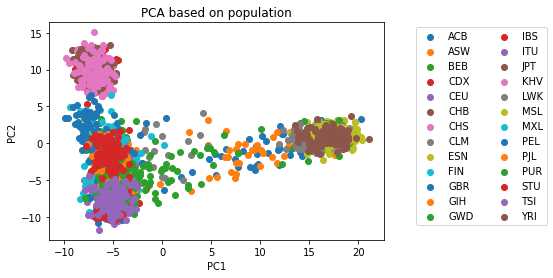

In [49]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("pop")
for name, group in tissues:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.5, 1), loc = 'upper right', ncol = 2)
plt.title('PCA based on population')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### plotting on superpopulation

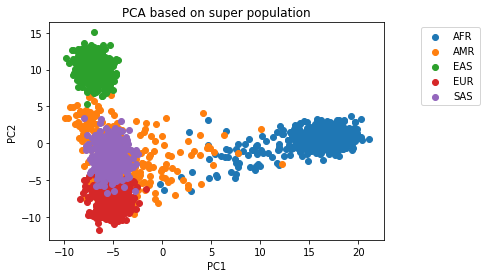

In [50]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("super_pop")
for name, group in tissues:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.3, 1), loc = 'upper right', ncol = 1)
plt.title('PCA based on super population')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### plotting based on sex

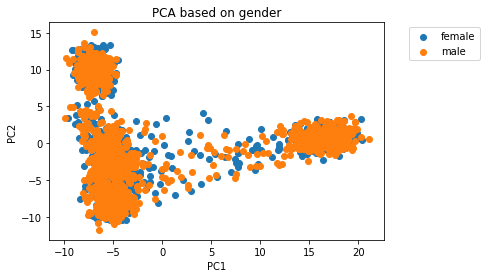

In [51]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("gender")
for name, group in tissues:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.3, 1), loc = 'upper right', ncol = 1)
plt.title('PCA based on gender')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()